In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# data (as pandas dataframes) 
df = census_income.data.features 
y = census_income.data.targets 

#### Data Description

| **Attribute**       | **Description**                                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|
| **Age**             | Describes the age of individuals. *Continuous*.                                                 |
| **Workclass**       | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. |
| **fnlwgt**          | *Continuous*.                                                                                   |
| **Education**       | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. |
| **Education-num**   | Number of years spent in education. *Continuous*.                                               |
| **Marital-status**  | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. |
| **Occupation**      | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. |
| **Relationship**    | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                              |
| **Race**            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                    |
| **Sex**             | Female, Male.                                                                                   |
| **Capital-gain**    | *Continuous*.                                                                                   |
| **Capital-loss**    | *Continuous*.                                                                                   |
| **Hours-per-week**  | *Continuous*.                                                                                   |
| **Native-country**  | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |
| **Salary**          | >50K, <=50K.                                                                                    |


In [3]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [4]:
df['income'] = y

In [5]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


---

In [7]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [8]:
for col in df.columns:
    print('------------')
    print(col)
    print(df[col].unique())

------------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
------------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]
------------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
------------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
------------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
------------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
------------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-

We need to address the '?' values, on workclass, native-country,occupation

In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [10]:
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_31068\3334233477.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)


In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
df.isna().sum() / len(df) * 100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
income            0.000000
dtype: float64

In [13]:
for col in ['workclass','native-country','occupation']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_31068\2710301076.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


### 3.Univariate Analysis

In [14]:
numerical_cols = df.select_dtypes(include=['int'])
categorical_cols = df.select_dtypes(include=['object'])

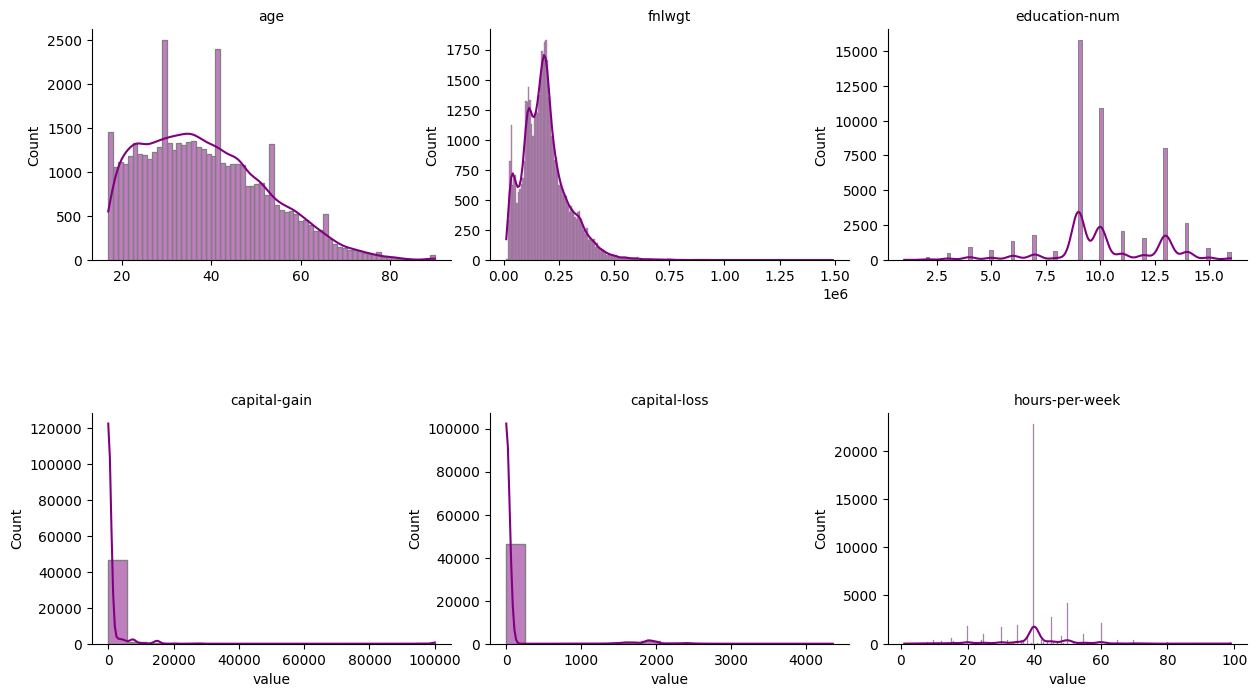

In [15]:
df_melt_num = numerical_cols.melt()
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=3, height=2,aspect=5,sharex=False, sharey=False)
g.map(sns.histplot, "value", color="purple", kde=True, edgecolor="grey")
g.set_titles("{col_name}")
g.fig.set_size_inches(12, 8)
plt.show()

c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


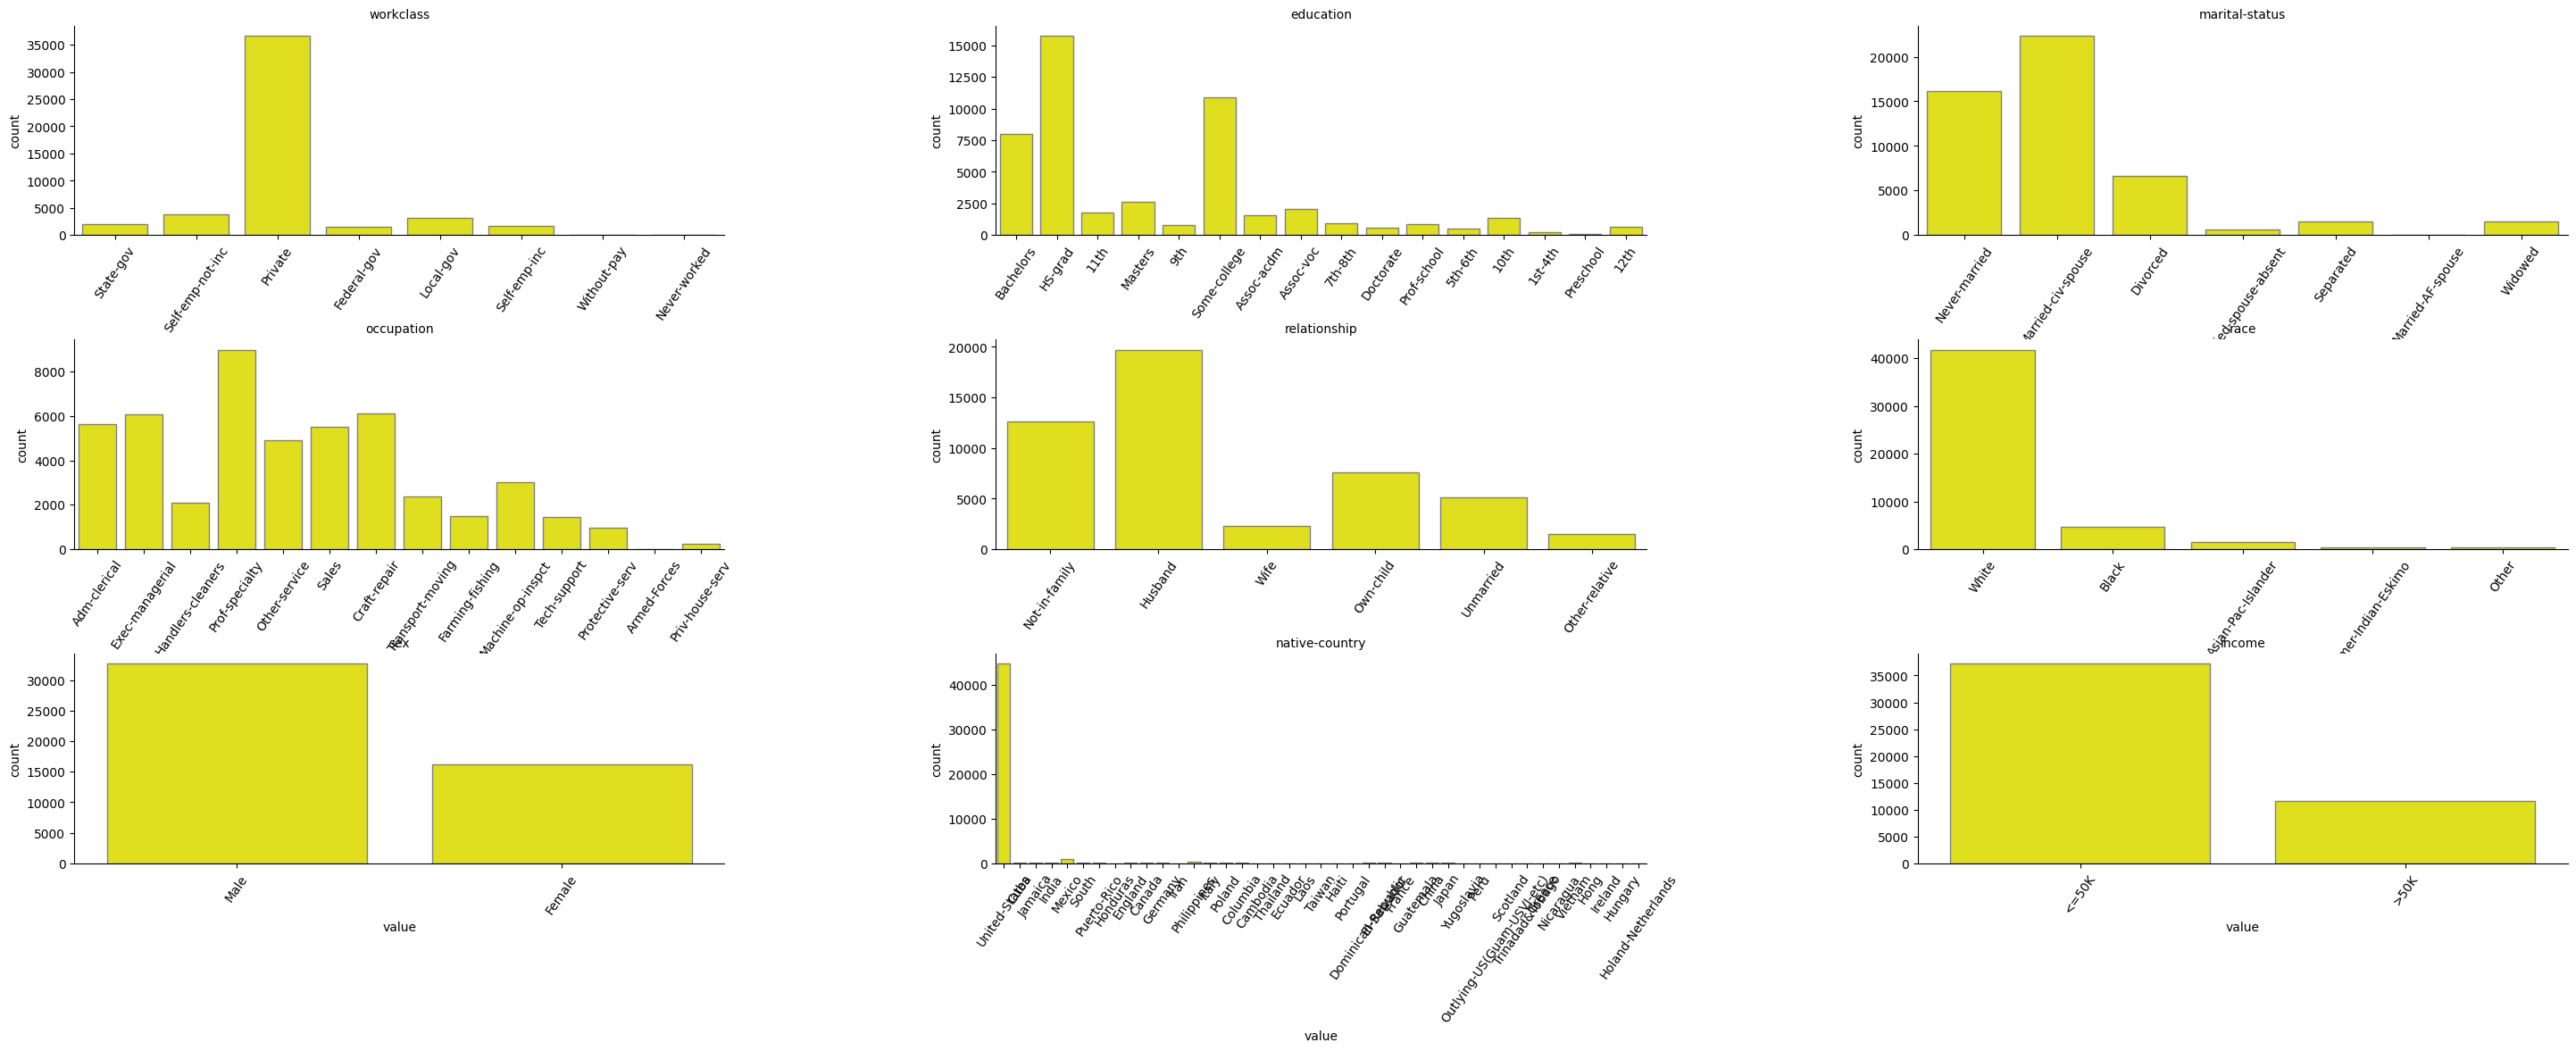

In [16]:
df_melt_cat = categorical_cols.melt()
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=3, height=5, sharex=False, sharey=False)
g.map(sns.countplot, "value", color="yellow", edgecolor="grey")
g.set_titles("{col_name}")
g.figure.set_size_inches(30,10)
g.set_xticklabels(rotation=55)
g.figure.subplots_adjust(hspace=0.5)  # Adjust the space between graphs
plt.show()

### 4. Bivariate Analysis

In [17]:
numerical_cols['income'] = df[['income']]
df_melt_num = numerical_cols.melt(id_vars=['income'])

c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


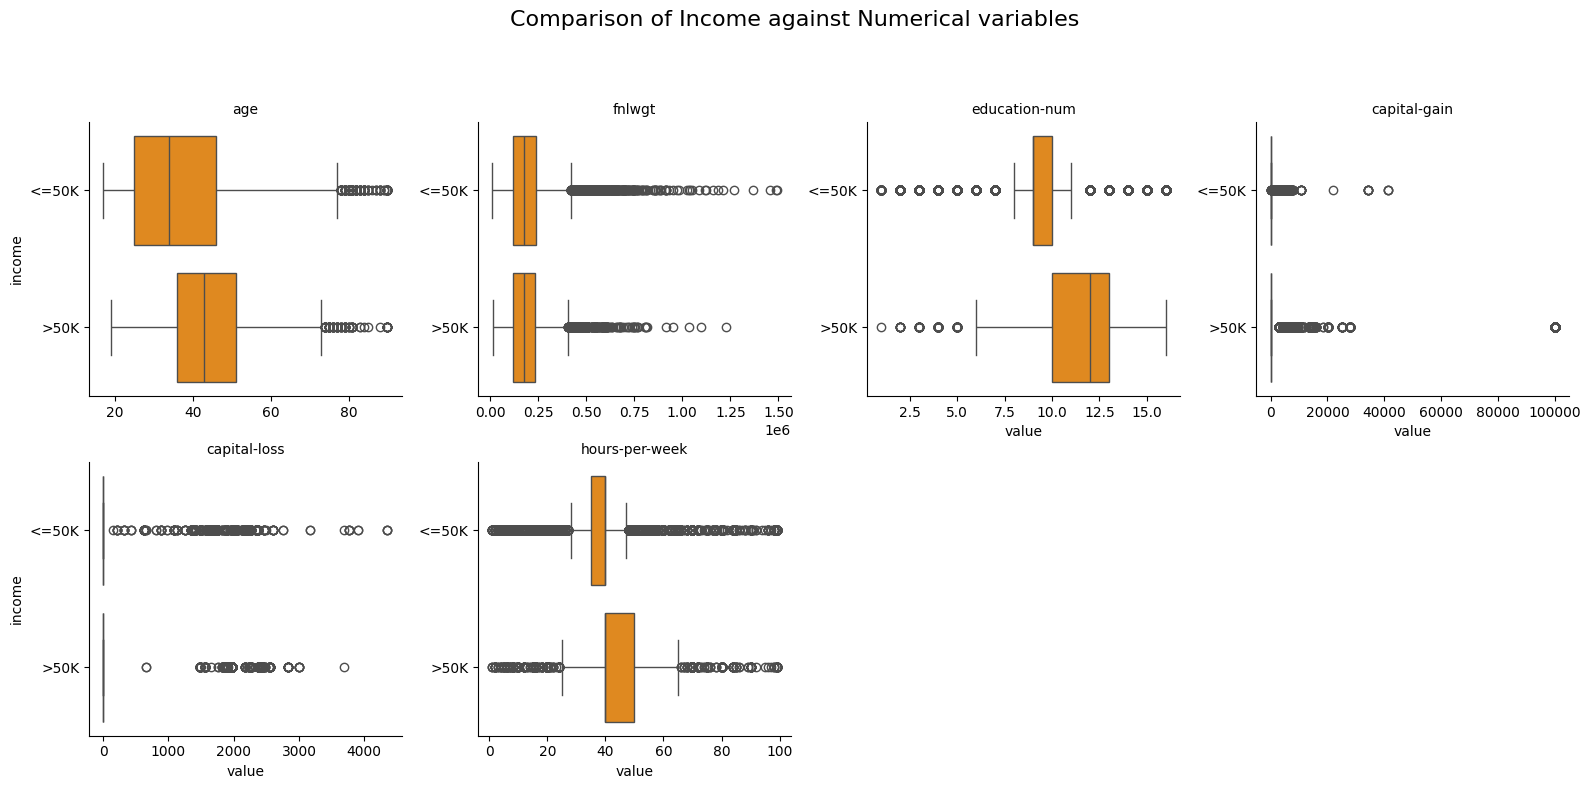

In [18]:
g = sns.FacetGrid(df_melt_num, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map(sns.boxplot,"value",'income', color="darkorange")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84) 
g.figure.suptitle("Comparison of Income against Numerical variables", fontsize=16)
plt.show()

In [19]:
categorical_cols['income'] = df[['income']]
df_melt_cat = categorical_cols.melt(id_vars=['income'])

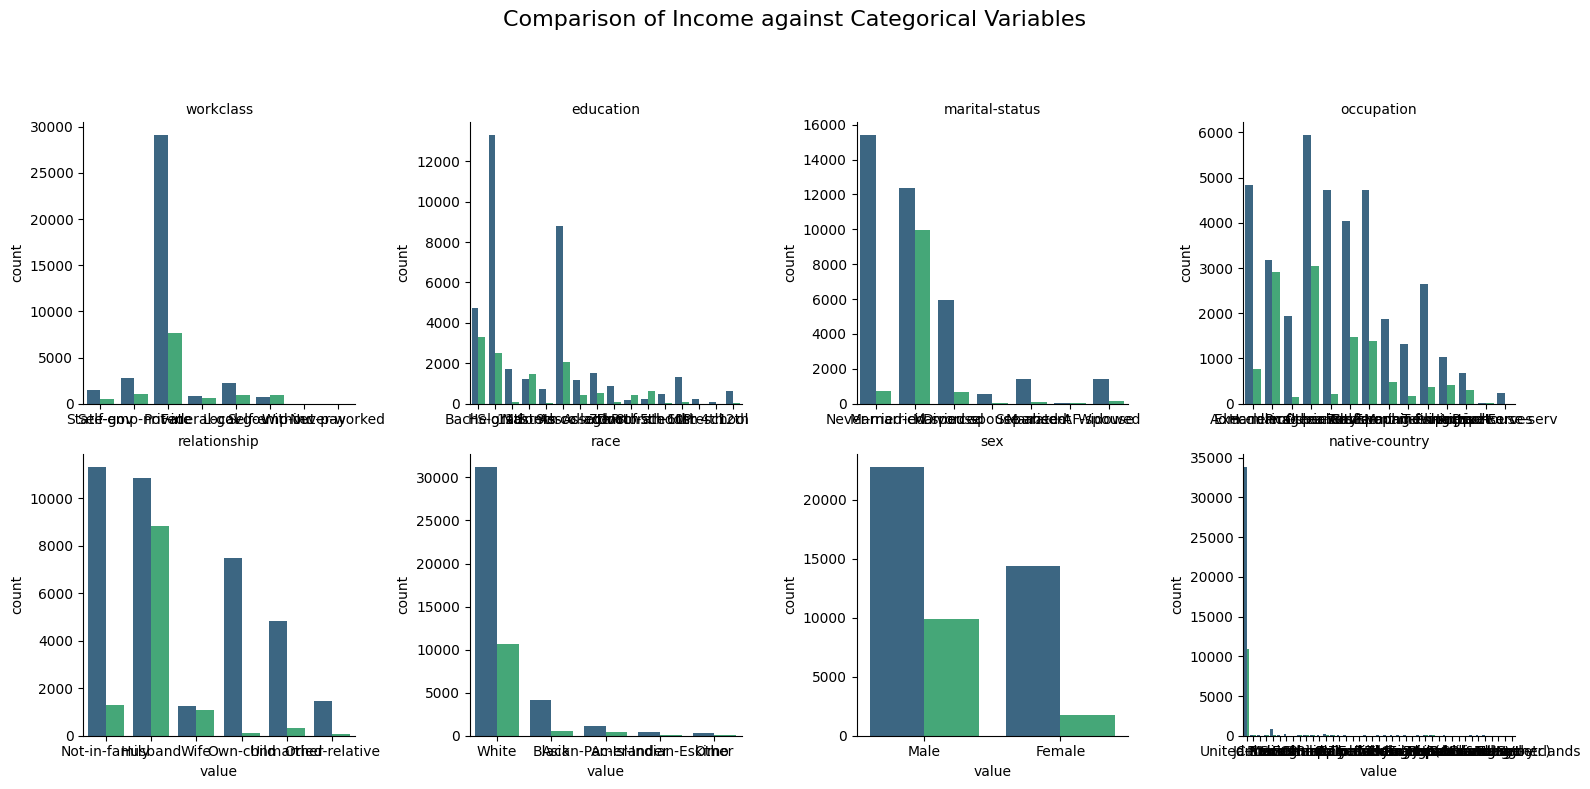

In [20]:
g = sns.FacetGrid(df_melt_cat, col="variable", col_wrap=4, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="value", hue="income",palette='viridis')  
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.84)
g.figure.suptitle("Comparison of Income against Categorical Variables", fontsize=16)

plt.show()

### Feature Engineering

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [22]:
df['education_level'] = df['education'].map( {
    'Preschool': 'basic',
    '1st-4th': 'basic',
    '5th-6th': 'basic',
    '7th-8th': 'basic',
    '9th': 'basic',
    '10th': 'highschool',
    '11th': 'highschool',
    '12th': 'highschool',
    'HS-grad': 'highschool',
    'Some-college': 'undergrad',
    'Assoc-acdm': 'undergrad',
    'Assoc-voc': 'undergrad',
    'Bachelors': 'undergrad',
    'Masters': 'grad',
    'Doctorate': 'postgraduate',
    'Prof-school': 'postgraduate'
})

In [23]:
df['capital-net'] = df['capital-gain'] - df['capital-loss']

In [24]:
df['capital-net'].fillna(df['capital-net'].median(), inplace=True)

C:\Users\Marcus\AppData\Local\Temp\ipykernel_31068\3008818354.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['capital-net'].fillna(df['capital-net'].median(), inplace=True)


In [25]:
df['sector'] = df['workclass'].map({
    'Private': 'Private',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-not-inc': 'Self_Employed',
    'Self-emp-inc': 'Self_Employed',
    'Without-pay': 'Other',
    'Never-worked': 'Other'
})

In [26]:
df['capital_per_hour'] = df['capital-net'] / df['hours-per-week']

### 5. Data Preprocessing

In [27]:
numerical_cols = df.select_dtypes(include=['int'])
categorical_cols = df.select_dtypes(include=['object'])

quick overview of categorical:


In [28]:
for col in categorical_cols.columns:
   print('-'*10)
   print(col)
   print(categorical_cols[col].unique())

----------
workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
----------
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
----------
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
----------
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
----------
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
----------
sex
['Male' 'Female']
----------
native-country
['United-States' 'Cuba' 'Jam

only education is ordinal

#### Process Ordinal Data

In [29]:
from sklearn.preprocessing import OrdinalEncoder
education_order = [
['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']
]
encoder = OrdinalEncoder(categories=education_order)
df['education'] = encoder.fit_transform(df[['education']])


education_level_order = [
['basic','highschool','undergrad','grad','postgraduate']
]
encoder = OrdinalEncoder(categories=education_level_order)
df['education_level'] = encoder.fit_transform(df[['education_level']])

In [30]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
race_encoded = ohe.fit_transform(df[['race']]).toarray()


race_encoded = pd.DataFrame(race_encoded, columns=ohe.get_feature_names_out(['race']))
race_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, race_encoded], axis=1)
df.drop(columns=['race'],inplace=True)

In [32]:
ohe = OneHotEncoder()
relationship_encoded = ohe.fit_transform(df[['relationship']]).toarray()


relationship_encoded = pd.DataFrame(relationship_encoded, columns=ohe.get_feature_names_out(['relationship']))
relationship_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, relationship_encoded], axis=1)
df.drop(columns=['relationship'],inplace=True)

In [33]:
sector_encoded = ohe.fit_transform(df[['sector']]).toarray()


sector_encoded = pd.DataFrame(sector_encoded, columns=ohe.get_feature_names_out(['sector']))
sector_encoded.reset_index(drop=True, inplace=True)
df = pd.concat([df, sector_encoded], axis=1)
df.drop(columns=['sector'],inplace=True)

In [34]:
from sklearn.preprocessing import TargetEncoder
target_cols = ['native-country','workclass','occupation','marital-status']
encoder = TargetEncoder()
for col in target_cols:
    df[col] = encoder.fit_transform(df[[col]], df['income'])

In [35]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sector_Government,sector_Other,sector_Private,sector_Self_Employed
0,39,0.264540,77516,12.0,13,0.045941,0.133676,0,2174,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,0.281702,83311,12.0,13,0.445830,0.479292,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38,0.209340,215646,8.0,9,0.100222,0.068538,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53,0.208012,234721,6.0,7,0.445733,0.062685,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28,0.208239,338409,12.0,13,0.445733,0.337665,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0.208239,215419,12.0,13,0.097804,0.338462,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,64,0.209340,321403,8.0,9,0.090206,0.343334,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,38,0.208436,374983,12.0,13,0.445830,0.335938,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48840,44,0.208341,83891,12.0,13,0.101248,0.139752,0,5455,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
for col in df.columns:
   print('-'*10)
   print(col)
   print(df[col].unique())

----------
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
----------
workclass
[0.26453987 0.28170229 0.20934048 0.20801187 0.20823933 0.20843641
 0.27607246 0.20834139 0.27374041 0.28308199 0.38842571 0.29390191
 0.30447356 0.4063583  0.26830381 0.37735115 0.55181953 0.54527751
 0.27861552 0.29307889 0.39998975 0.27481873 0.55322195 0.28817407
 0.55863719 0.38592093 0.29823964 0.2669009  0.2642162  0.55613281
 0.12159515 0.         0.12159473 0.07568633 0.05528434]
----------
fnlwgt
[ 77516  83311 215646 ... 173449  89686 350977]
----------
education
[12.  8.  6. 13.  4.  9. 10. 11.  3. 14. 15.  2.  5.  1.  0.  7.]
----------
education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
----------
marital-status
[0.04594055 0.44583001 0.10022184 0.44573312 0.44631102 0.09394785
 0.44682251 0.04535626 0

#### Numerical Variables

In [37]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : 1.44
education-num skewness : -0.32
capital-gain skewness : 11.89
capital-loss skewness : 4.57
hours-per-week skewness : 0.24
capital-net skewness : 11.81


In [38]:
def log_transform(x):
    return np.log(x + 1)

df['fnlwgt'] = log_transform(df['fnlwgt'])
df['capital-loss'] = log_transform(df['capital-loss'])
df['capital-gain'] = log_transform(df['capital-gain'])
df['capital-net'] = log_transform(df['capital-net'])

c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for col in numerical_cols.columns:
    df[col] = scaler.fit_transform(df[[col]])


In [40]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sector_Government,sector_Other,sector_Private,sector_Self_Employed
0,0.025996,0.264540,-1.148848,12.0,1.136512,0.045941,0.133676,0,2.844559,-0.221264,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.828308,0.281702,-1.034558,12.0,1.136512,0.445830,0.479292,0,-0.297918,-0.221264,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.046942,0.209340,0.473105,8.0,-0.419335,0.100222,0.068538,0,-0.297918,-0.221264,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.047121,0.208012,0.607471,6.0,-1.197259,0.445733,0.062685,0,-0.297918,-0.221264,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.776316,0.208239,1.187449,12.0,1.136512,0.445733,0.337665,1,-0.297918,-0.221264,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.025996,0.208239,0.471436,12.0,1.136512,0.097804,0.338462,1,-0.297918,-0.221264,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,1.849433,0.209340,1.105714,8.0,-0.419335,0.090206,0.343334,0,-0.297918,-0.221264,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,-0.046942,0.208436,1.350137,12.0,1.136512,0.445830,0.335938,0,-0.297918,-0.221264,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48840,0.390683,0.208341,-1.023560,12.0,1.136512,0.101248,0.139752,0,3.220639,-0.221264,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
for col in numerical_cols.columns:
     print(f'{col} skewness : {df[col].skew():.2f}')


age skewness : 0.56
fnlwgt skewness : -0.84
education-num skewness : -0.32
capital-gain skewness : 3.11
capital-loss skewness : 4.30
hours-per-week skewness : 0.24
capital-net skewness : 3.02


#### Feature Selection

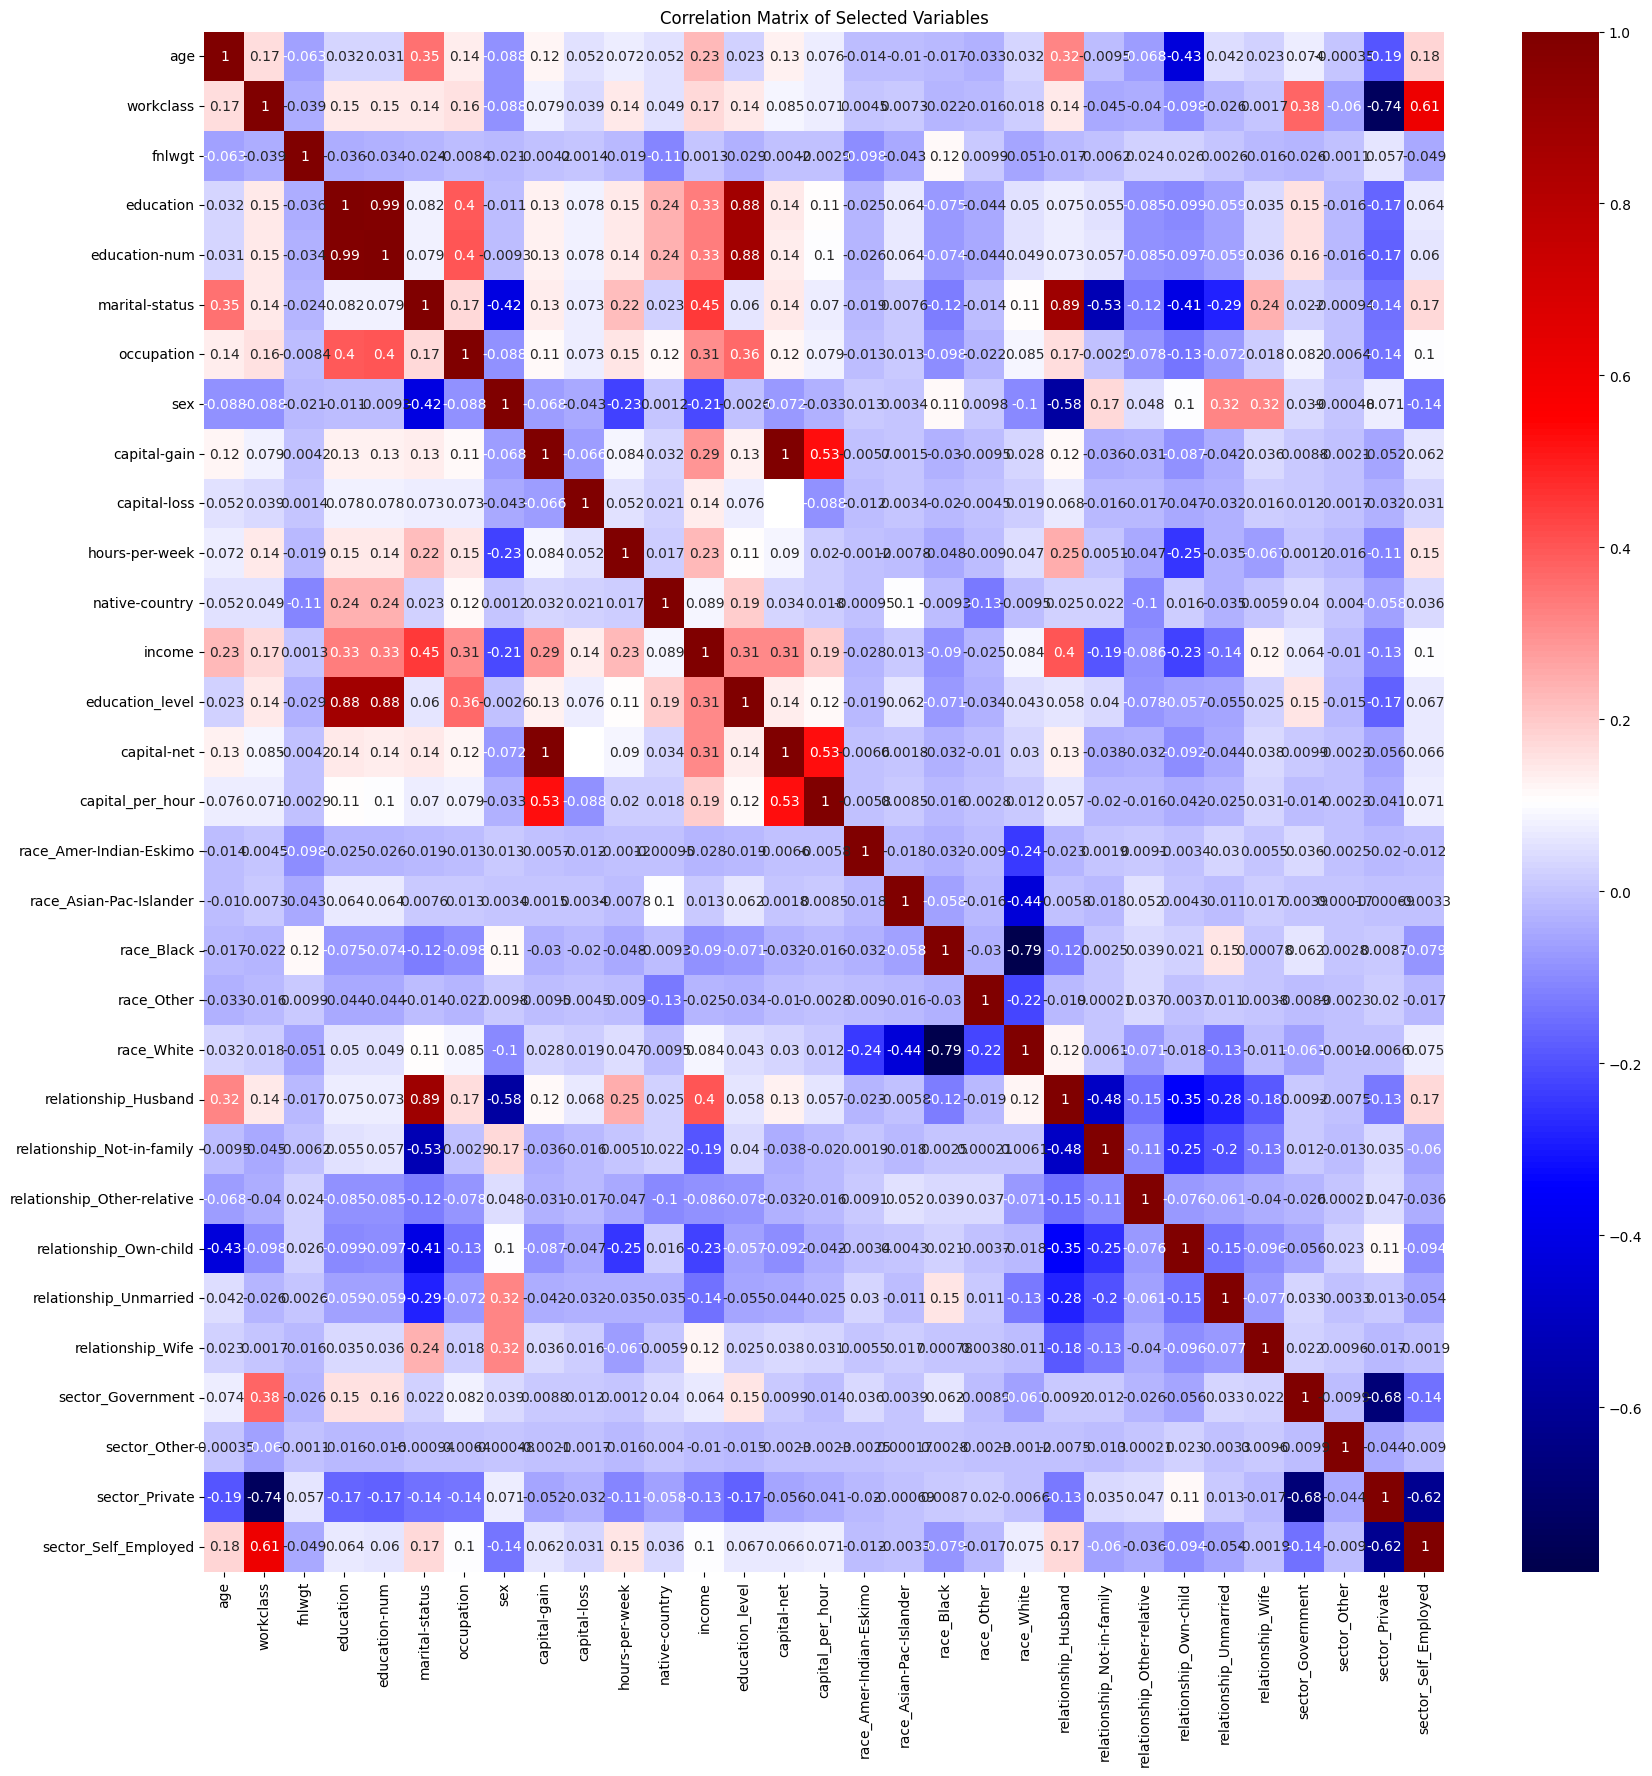

In [42]:
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

Text(0.5, 1.0, 'Correlation to Income')

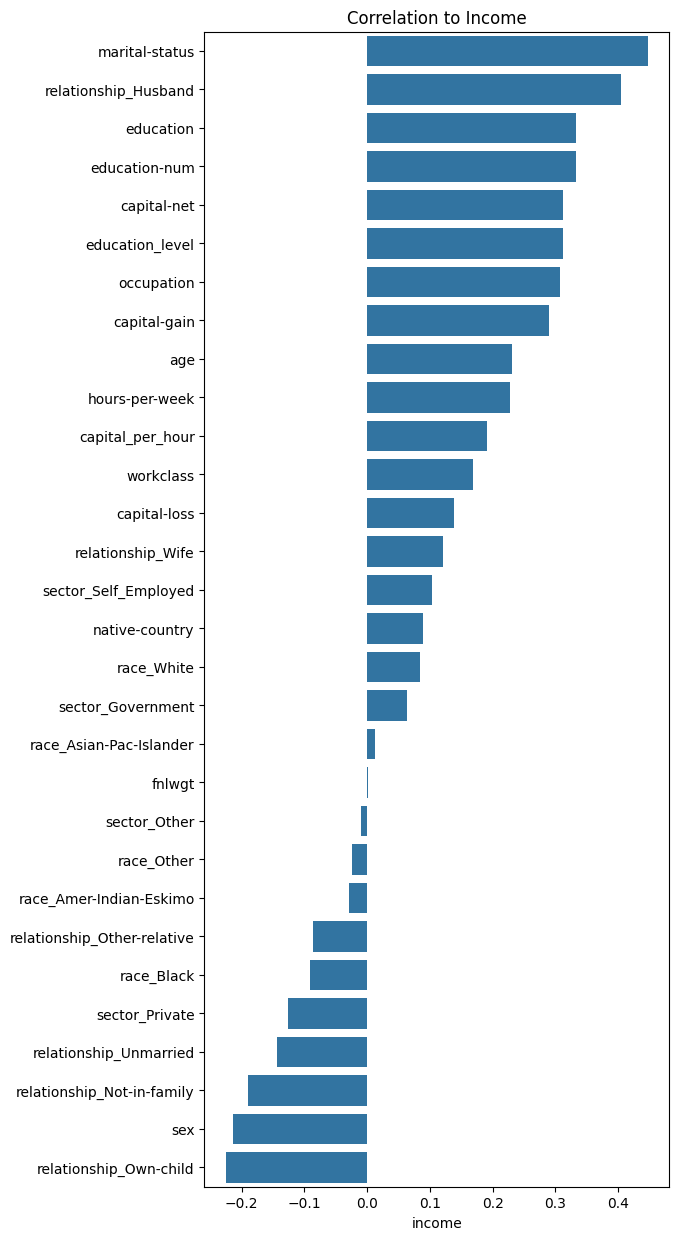

In [43]:
plt.figure(figsize=(6,15))
sns.barplot(df.corr()['income'].drop('income').sort_values(ascending=False),orient = 'h')
plt.title('Correlation to Income')


In [44]:
col_to_drop = []
for col, v in df.corr()['income'].items():
    if -0.2 < v < 0.2:
        col_to_drop.append(col)
        print(col)


workclass
fnlwgt
capital-loss
native-country
capital_per_hour
race_Amer-Indian-Eskimo
race_Asian-Pac-Islander
race_Black
race_Other
race_White
relationship_Not-in-family
relationship_Other-relative
relationship_Unmarried
relationship_Wife
sector_Government
sector_Other
sector_Private
sector_Self_Employed


In [45]:
df.drop(columns=col_to_drop,inplace=True)

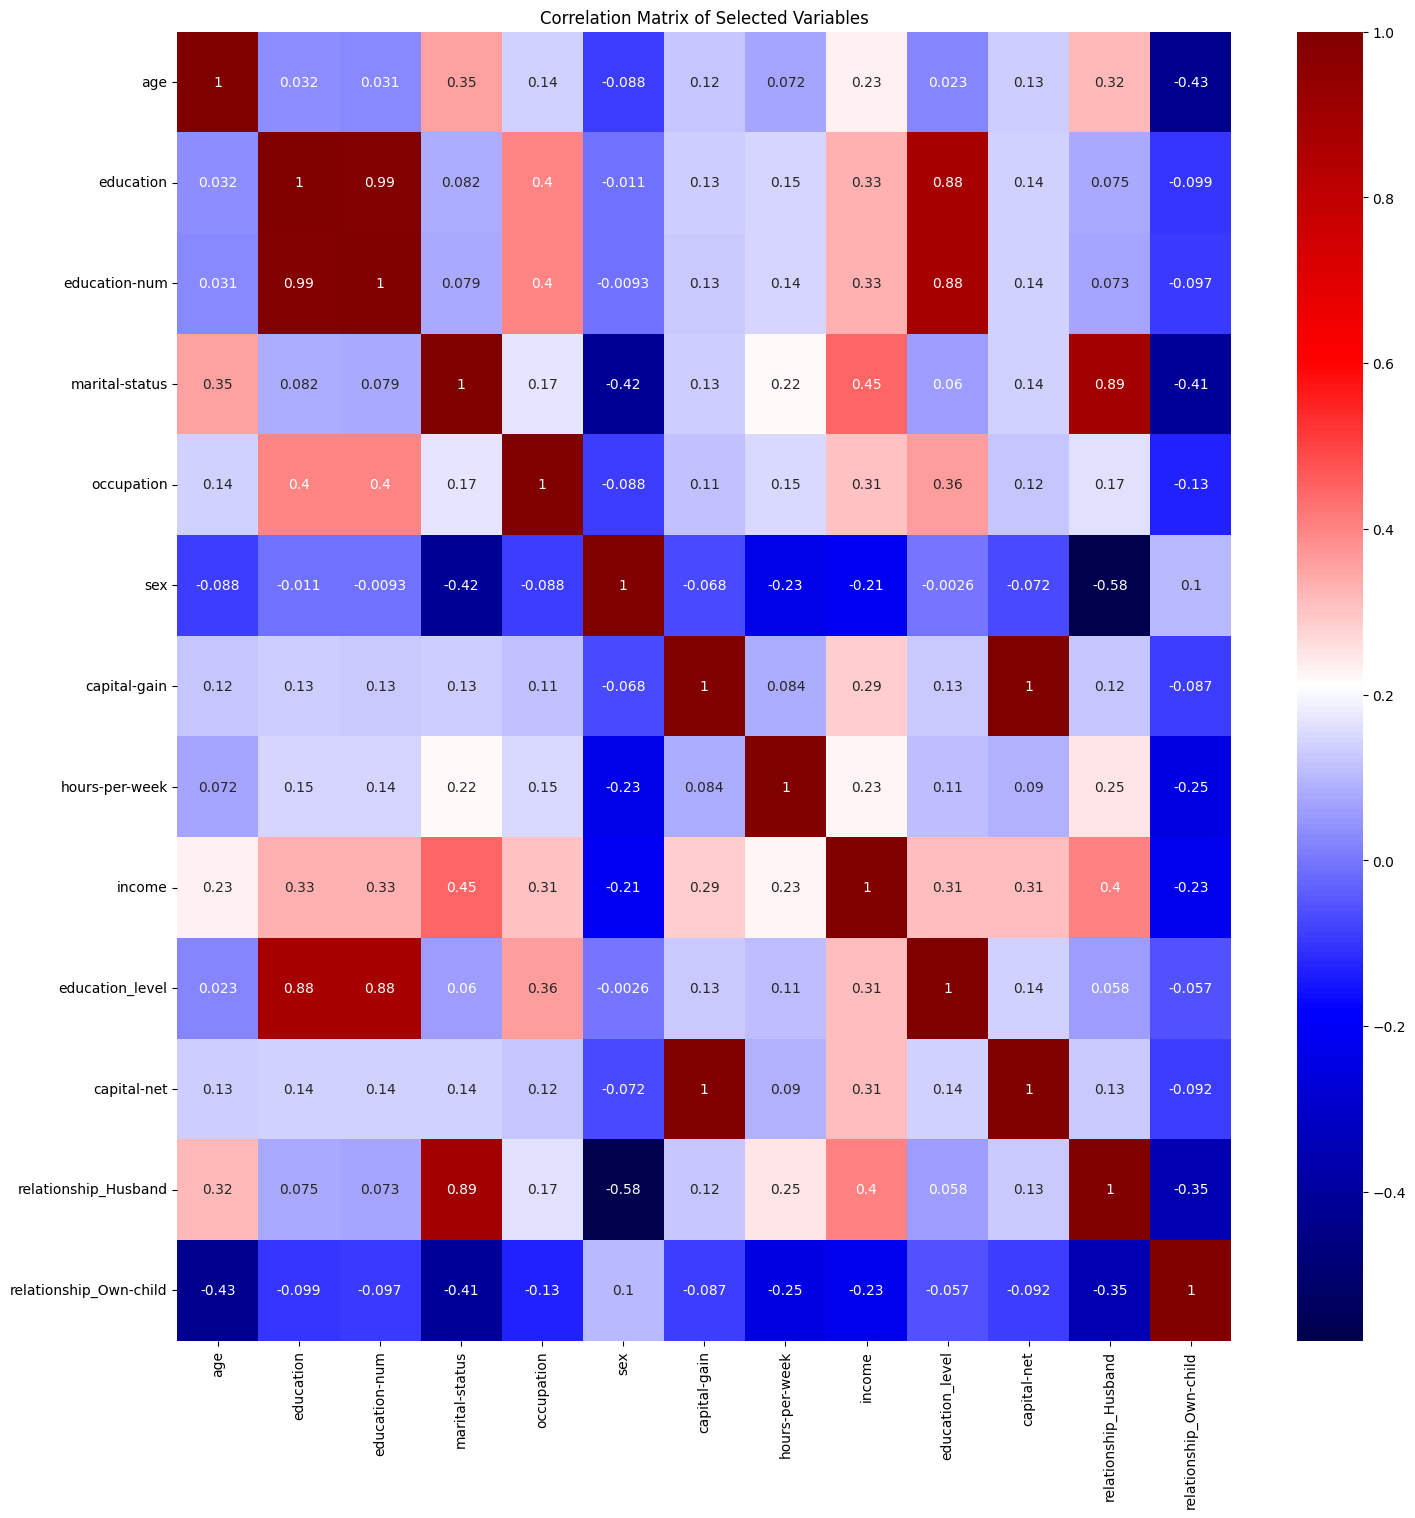

In [46]:
plt.figure(figsize=(17,17))
plt.title('Correlation Matrix of Selected Variables')
sns.heatmap(df.corr(),annot=True,cmap='seismic')
plt.show()

#### Modelling

In [47]:
X = df.drop('income',axis=1)
X.head(3)

,age,education,education-num,marital-status,occupation,sex,capital-gain,hours-per-week,education_level,capital-net,relationship_Husband,relationship_Own-child
0,0.025996,12.0,1.136512,0.045941,0.133676,0,2.844559,-0.034087,2.0,2.769085,0.0,0.0
1,0.828308,12.0,1.136512,0.445830,0.479292,0,-0.297918,-2.213032,2.0,-0.305797,1.0,0.0
2,-0.046942,8.0,-0.419335,0.100222,0.068538,0,-0.297918,-0.034087,1.0,-0.305797,0.0,0.0


In [48]:
y = df['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=True,random_state=42,test_size=0.25)
print(f'X shape: {X_train.shape},{X_test.shape}')
print(f'y shape: {y_train.shape},{y_test.shape}')

X shape: (36631, 12),(12211, 12)
y shape: (36631,),(12211,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,roc_auc_score, confusion_matrix
lr = LogisticRegression()
lr.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
y_pred = lr.predict(X_test)

<Axes: >

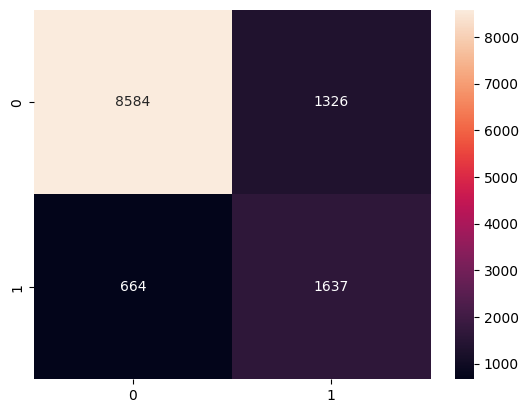

In [ ]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt=".0f",)

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

<Axes: >

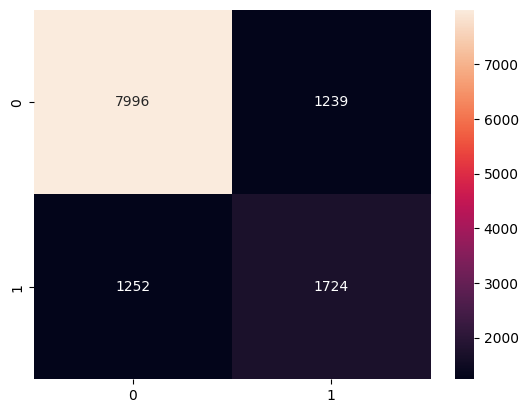

In [ ]:
sns.heatmap(confusion_matrix(y_pred_dtc,y_test),annot=True,fmt=".0f",)

In [53]:
gbmc = LGBMClassifier()
gbmc.fit(X_train,y_train)
y_pred_gbmc = gbmc.predict(X_test)

[LightGBM] [Info] Number of positive: 8724, number of negative: 27907
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 36631, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238159 -> initscore=-1.162800
[LightGBM] [Info] Start training from score -1.162800


<Axes: >

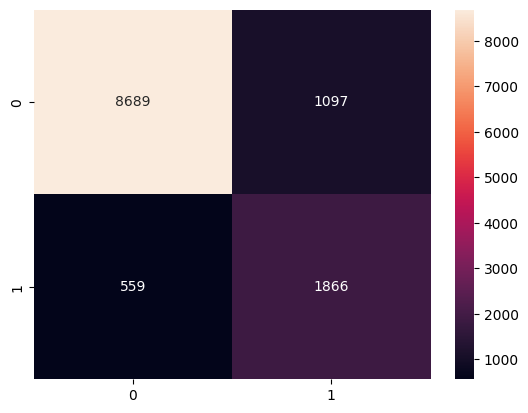

In [55]:
accuracy_score(y_pred_gbmc,y_test)
sns.heatmap(confusion_matrix(y_pred_gbmc,y_test),annot=True,fmt=".0f",)

In [56]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [57]:
def evaluate_scores(X, y, model, verbose=0):
    print('Cross Validation for 4 Folds per Metric')

    accuracy = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="accuracy")
    precision = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="precision")
    recall = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="recall")
    f1 = cross_val_score(model, X, y, cv=kf, verbose=verbose, scoring="f1")

    print('-' * 10)
    print(f'Accuracy : {np.mean(accuracy):.4f}')
    print(f'Precision : {np.mean(precision):.4f}')
    print(f'Recall : {np.mean(recall):.4f}')
    print(f'F1 Score : {np.mean(f1):.4f}')
    print('-' * 10)


In [58]:
evaluate_scores(X,y,lr)

Cross Validation for 4 Folds per Metric


ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\Marcus\Documents\[1] Programming Projects\6005CEM-ML\.venv\lib\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
